In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
# Step 1: Load the dataset
df = pd.read_csv('Crop_recommendation.csv')
print("Dataset loaded with shape:", df.shape)

Dataset loaded with shape: (2200, 8)


In [13]:
# Step 2: Label Encoding
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
print("Encoded Crop Labels:", dict(zip(le.classes_, le.transform(le.classes_))))

Encoded Crop Labels: {'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


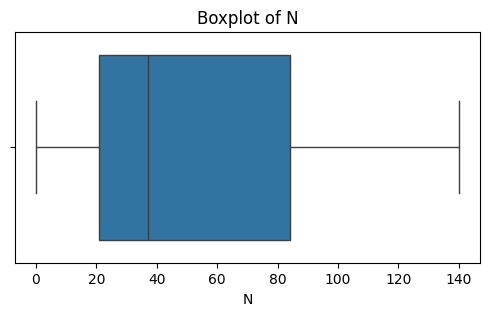

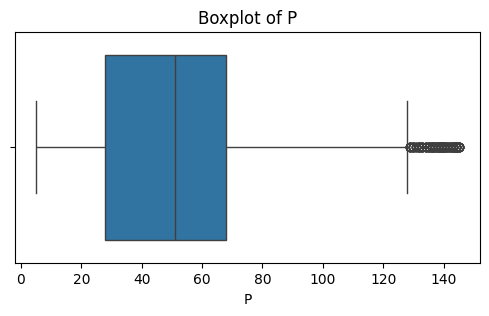

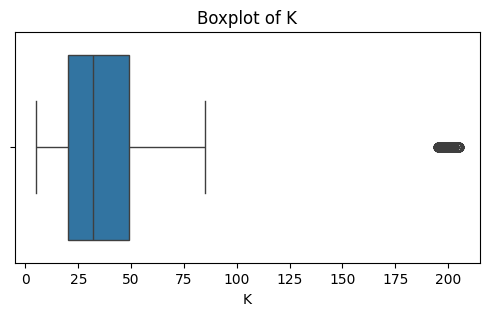

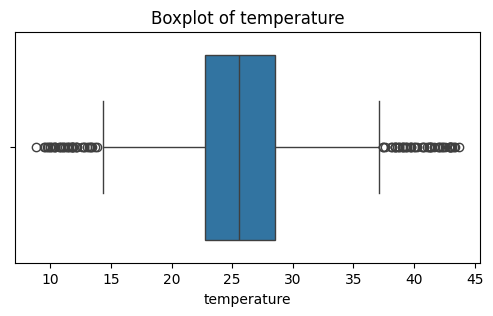

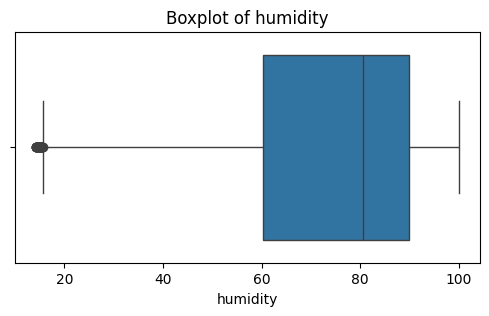

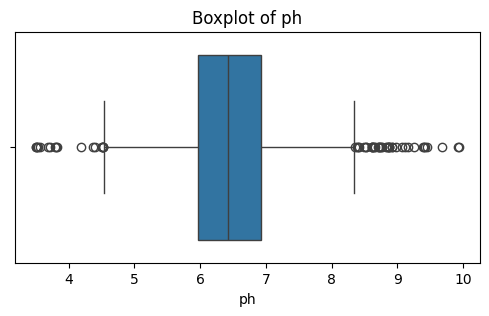

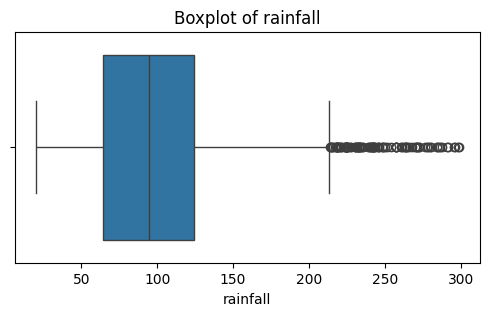

In [9]:
# Step 3: Flag Outliers (optional, visual only)
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [16]:
# Step 4: Feature Scaling (Optional - only if using SVM, KNN)
scaler = StandardScaler()
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[features]
X_scaled = scaler.fit_transform(X)

In [17]:

# Step 5: Prepare final features and target
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)


Training Features Shape: (1760, 7)
Test Features Shape: (440, 7)


In [ ]:

# Save label encoder and scaler if needed later
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Model Training


In [18]:
# ✅ Step 1: Import libraries for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [19]:
# ✅ Step 2: Initialize Random Forest model
model = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    random_state=42         # Ensures reproducible results
)


In [21]:
# ✅ Step 3: Train the model using training data
model.fit(X_train, y_train)
print("🎉 Model training completed!")


🎉 Model training completed!


In [22]:
# ✅ Step 4: Predict on test data
y_pred = model.predict(X_test)

In [24]:
# ✅ Step 5: Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9931818181818182

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00

In [23]:
# ✅ Step 6: Save the trained model to use in backend API
joblib.dump(model, 'crop_recommendation_model.pkl')
print("💾 Model saved as 'crop_recommendation_model.pkl'")


💾 Model saved as 'crop_recommendation_model.pkl'


# Using Model

In [26]:
# Load label encoder
import joblib
le = joblib.load('label_encoder.pkl')

# Decode a few predictions
decoded_preds = le.inverse_transform(y_pred[:10])
print("🌿 Sample Predictions:", decoded_preds)


🌿 Sample Predictions: ['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil']


In [27]:
sample1 = [[90, 40, 40, 25.0, 80.0, 6.5, 120.0]]   # rice-like
sample2 = [[50, 30, 30, 38.0, 30.0, 7.0, 40.0]]   # cotton-like
sample3 = [[30, 20, 20, 16.0, 70.0, 6.5, 200.0]]  # apple-like

model = joblib.load("crop_recommendation_model.pkl")
label_encoder = joblib.load('label_encoder.pkl')
for s in [sample1, sample2, sample3]:
    pred = model.predict(s)
    print(label_encoder.inverse_transform(pred))

['apple']
['apple']
['apple']


In [33]:
import numpy as np
scaler = joblib.load("scaler.pkl")
input_array = [[50, 30, 30, 38.0, 30.0, 7.0, 40.0]]
prediction_encoded = model.predict(input_array)[0]
input_scaled = scaler.transform(input_array)
prediction_encoded = model.predict(input_scaled)[0]

input_array = np.array(features).reshape(1, -1)
input_scaled = scaler.transform(input_array)
prediction_encoded = model.predict(input_scaled)[0]
crop_name = label_encoder.inverse_transform([prediction_encoded])[0]


c:\Users\Hindavi\anaconda3\envs\tensorflow_env1\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Hindavi\anaconda3\envs\tensorflow_env1\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'N'